In [1]:
import artm
import os

In [ ]:
# To build АRТМ model - first create data in vpw format

data_dir='../data/'
#vpw_name='rnd-walls_vpw.txt'
vpw_name='rnd-walls_spam_filteredLR_vpw.txt'

with open(data_dir+vpw_name, 'w', encoding='utf8') as vpw_file:  #file to write lemmas and bigramms
    for index, row in df.iterrows():
        preprocessed_text=preprocessing(row['text'])
        unigrams_count_line=get_counted_unigrams(preprocessed_text)
        bigrams_count_line = get_counted_bigrams(preprocessed_text)
        if len(unigrams_count_line)>0:
            new_line=str(row['user_id'])+'_'+str(row['post_id']) + ' |text ' + unigrams_count_line + ' |bigrams ' + bigrams_count_line
            #print (new_line)
            vpw_file.write(new_line)
            vpw_file.write('\n')

In [2]:
# lc = artm.messages.ConfigureLoggingArgs()
# lc.minloglevel=2  # 0 = INFO, 1 = WARNING, 2 = ERROR, 3 = FATAL
# when pass lc to constructor you may also change log location like this:  lc.log_dir=r'C:\bigartm_log'
#lc.log_dir=r'###'   #create dir
# lib = artm.wrapper.LibArtm(logging_config=lc)

In [34]:
data_file='rnd-walls_spam_filteredLR_vpw.txt'
data_dir = os.path.join('..', 'results_from_rnd_walls', 'data')

# ----  BIGARTM !!! ------
batch_vectorizer = artm.BatchVectorizer(data_path=os.path.join(data_dir,data_file),
                                        data_format='vowpal_wabbit',
                                        target_folder='collection_batches_filtered',
                                        class_ids=['text', 'bigrams'] 
                                       )

main_dictionary = artm.Dictionary()
main_dictionary.gather(data_path='collection_batches_filtered')
main_dictionary.save(dictionary_path= os.path.join('collection_batches_filtered','main_dictionary'))
main_dictionary.save_text(dictionary_path=os.path.join('collection_batches_filtered','main_dictionary.txt'))

In [6]:
main_dictionary = artm.Dictionary()
main_dictionary.load_text(dictionary_path=os.path.join('collection_batches_filtered','main_dictionary_raw.txt'))

In [7]:
import pandas as pd

# read dictionary in pandas
dictionary_path=os.path.join('collection_batches_filtered','main_dictionary_raw.txt')
header=['token', 'class_id', 'value', 'tf', 'df']
main_pd = pd.read_csv(dictionary_path, delimiter=',', names=header, encoding="utf8")
print (main_pd.shape[0])
main_pd_=main_pd[2:]
main_pd_.head()

966514


/tmp/ipykernel_29401/1781244917.py:6: DtypeWarning: Columns (2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  main_pd = pd.read_csv(dictionary_path, delimiter=',', names=header, encoding="utf8")


,token,class_id,value,tf,df
2,свидание_мэри,bigrams,7.011093430264737e-07,1.0,1.0
3,кошка_свет,bigrams,7.011093430264737e-07,1.0,1.0
4,концерт_виталий,bigrams,7.011093430264737e-07,1.0,1.0
5,март_концерт,bigrams,1.4022186860529473e-06,2.0,2.0
6,перенести_ое,bigrams,1.4022186860529473e-06,2.0,2.0


In [8]:
print ('Number of words ', main_pd_.loc[(main_pd_.class_id==' text')].shape[0])
print ('Number of bigrams ', main_pd_.loc[(main_pd_.class_id==' bigrams')].shape[0])

Number of words  84067
Number of bigrams  882445


In [9]:
main_pd_['df'] = main_pd_['df'].astype('float')
main_pd_['tf'] = main_pd_['tf'].astype('float')

/tmp/ipykernel_29401/2827835474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_pd_['df'] = main_pd_['df'].astype('float')
/tmp/ipykernel_29401/2827835474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_pd_['tf'] = main_pd_['tf'].astype('float')


In [13]:
# look at the most common words
main_pd_.sort_values(by=['df'], ascending=False, inplace=True)
main_pd_[:50]

/tmp/ipykernel_91659/477773745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_pd_.sort_values(by=['df'], ascending=False, inplace=True)


,token,class_id,value,tf,df
681190,не,text,0.031285,47667.0,20026.0
581229,это,text,0.013763,20970.0,11383.0
520013,всё,text,0.009484,14450.0,9488.0
396256,весь,text,0.007415,11297.0,8159.0
520304,день,text,0.005456,8313.0,6290.0
477148,свой,text,0.006853,10441.0,6056.0
924278,человек,text,0.006276,9563.0,6003.0
581903,который,text,0.00565,8609.0,5298.0
599303,жизнь,text,0.004705,7169.0,5121.0
429337,хороший,text,0.004032,6143.0,4938.0


In [14]:
# filter words with df less than 2 and greater than 7000
main_dictionary.filter(class_id='text', min_df=2, max_df=7000) 

artm.Dictionary(name=7dde9ce7-408e-4c08-9e5f-a35df560c6d7, num_entries=924801)

In [15]:
# look at the most frequent bigrams
main_pd_bi=main_pd_.loc[(main_pd_.class_id==' bigrams')]
main_pd_bi.sort_values(by=['df'], ascending=False, inplace=True)
main_pd_bi[:50]

/tmp/ipykernel_91659/1700456307.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_pd_bi.sort_values(by=['df'], ascending=False, inplace=True)


,token,class_id,value,tf,df
341380,не_мочь,bigrams,0.00117,1669.0,1413.0
499015,это_не,bigrams,0.001165,1662.0,1389.0
510098,день_рождение,bigrams,0.000842,1201.0,1109.0
816804,не_знать,bigrams,0.000897,1280.0,1081.0
586306,человек_который,bigrams,0.000751,1071.0,932.0
393350,новый_год,bigrams,0.000728,1038.0,917.0
523486,никто_не,bigrams,0.000731,1042.0,907.0
891899,друг_друг,bigrams,0.000598,853.0,683.0
447785,каждый_день,bigrams,0.000477,680.0,608.0
523608,который_не,bigrams,0.000446,636.0,576.0


In [16]:
# filter bigrams with df less than 2
main_dictionary.filter(class_id='bigrams', min_df=2) 

artm.Dictionary(name=7dde9ce7-408e-4c08-9e5f-a35df560c6d7, num_entries=196277)

In [17]:
# -- Set up domain (d) and background (b) topics 

def SetTopicsNum(d, b):
    background_topics = []
    domain_topics = []
    all_topics = []

    for i in range(1, d+b+1):
        if i <= d:
            topic_name = "d" + str(i)
            domain_topics.append(topic_name)
        else:
            topic_name = "b" + str(i)
            background_topics.append(topic_name)
        all_topics.append(topic_name)
    return all_topics, domain_topics, background_topics
# ---
#-- Initialize model
batch_vectorizer = artm.BatchVectorizer(data_path='collection_batches_filtered',
                                        data_format='batches')
#main_dictionary = artm.Dictionary()
#main_dictionary.load_text(dictionary_path='collection_batches/main_dictionary.txt')

In [18]:
def SetScores(model):
    
    model.scores.add(artm.PerplexityScore(name='Perplexity_Score',
                                      dictionary=main_dictionary))
 
    model.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore_bigrams', 
                                           class_id='bigrams'))                 
    
    model.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore')) 
    
    model.scores.add(artm.TopTokensScore(name='Bigrams_Top10_Tokens', 
                                         num_tokens=10, 
                                         dictionary = main_dictionary,
                                         class_id='bigrams'))
                                            
    model.scores.add(artm.TopTokensScore(name='Text_Top10_Tokens', 
                                         num_tokens=10, 
                                         dictionary = main_dictionary,
                                         class_id='text'))
                                                  
    model.scores.add(artm.TopicKernelScore(name='DomainTopicKernelScore', 
                                           probability_mass_threshold=0.25, 
                                           class_id='bigrams' )) 

In [35]:
import matplotlib.pyplot as plt

def plot_figures(model):
    
    print ("number of topics: ", len(model.topic_names))
    print ("rnd-realization: ", model.seed)

    # perplexity
    x = range(model.num_phi_updates)[1:]
    fig, ax1 = plt.subplots()
    #plt.title(u'Метрики качества модели, 15*'+ '$\\tau$/|$W_t$|, $\\tau$='+ str(format(tau_value, ".0e")), fontsize=14, y=1.06)
    
    ax1.plot(x, model.score_tracker['Perplexity_Score'].value[1:], 'g-', linewidth=1, label=u"Perplexity")
    ax1.set_xlabel(u'Iteration num.')
    ax1.set_ylabel(u'Perplexity', color='g')
    ax2 = ax1.twinx()
    
   # ax2.plot(x, model.score_tracker['SparsityPhiScore_text'].value[1:], 'r*', linewidth=1, label=u'Разреженность '+'$\\Phi$'+'-text')
    ax2.plot(x, model.score_tracker['SparsityPhiScore_bigrams'].value[1:], 'r:', linewidth=1, label=u'Sparsity '+'$\\Phi$'+'-bigrams')
    ax2.plot(x, model.score_tracker['SparsityThetaScore'].value[1:], 'r-.', linewidth=1, label=u'Sparsity '+'$\\Theta$')
    ax2.set_ylabel(u'Percent.', color='r')
    ax2.legend(bbox_to_anchor=(1.10, 1), loc=2, borderaxespad=0.)
    
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.3)
    
    
    ax1.text(0.14, -0.16, u'Perplexity: ' + str(round(model.score_tracker['Perplexity_Score'].last_value, 3))+
            # u'\nРазреженность ' +'$\\Phi$'+'-text: ' + str(round(model.score_tracker['SparsityPhiScore_text'].last_value, 3))+
             u',  Sparsity ' +'$\\Phi$'+'-bigrams: ' +str(round(model.score_tracker['SparsityPhiScore_bigrams'].last_value, 3))+
             u'\nSparsity ' +'$\\Theta$: '+str(round(model.score_tracker['SparsityThetaScore'].last_value,3)), 
         transform=plt.gcf().transFigure, bbox=props)


    plt.grid(True)
    #plt.savefig(topics_directory+'scores_sparsity.png', dpi=150, bbox_inches = 'tight')
    plt.show()
    
    # kernels
    x = range(model.num_phi_updates)[1:]
    fig, ax1 = plt.subplots()
    ax1.plot(x, model.score_tracker['DomainTopicKernelScore'].average_size[1:], 'g-', linewidth=1, label=u"Kernel size")
    ax1.set_xlabel(u'Iteration num.')
    ax1.set_ylabel(u'Kernel size', color='g')
    ax2 = ax1.twinx()
    ax2.plot(x, model.score_tracker['DomainTopicKernelScore'].average_contrast[1:], 'r*', linewidth=1, label=u"Contrast")
    ax2.plot(x, model.score_tracker['DomainTopicKernelScore'].average_purity[1:], 'r--', linewidth=1, label=u"Purity")
    ax2.set_ylabel(u'Percent.', color='r')
    ax2.legend(bbox_to_anchor=(1.10, 1), loc=2, borderaxespad=0.)
    kernel=model.score_tracker['DomainTopicKernelScore'].last_average_size
    last_average_contrast=model.score_tracker['DomainTopicKernelScore'].last_average_contrast
    last_average_purity=model.score_tracker['DomainTopicKernelScore'].last_average_purity
    ax1.text(0.14, -0.07, u'Kernel size: ' + str(round(kernel, 3))+
             u',  Contrast: ' + str(round(last_average_contrast, 3))+
             u',  Purity: ' + str(round(last_average_purity, 3)),
         transform=plt.gcf().transFigure, bbox=props)
    
    plt.grid(True)
    #plt.savefig(topics_directory+'scores_kernel.png', dpi=150, bbox_inches = 'tight')
    plt.show()
    return kernel, last_average_contrast, last_average_purity

In [36]:
# The header of the table was preformed:
#TopicTrackerTable = pd.DataFrame(columns=['num', 'seed', topics num', 'class_ids', 'steps num', 'strategy', 'perplexity', 'Phi-sparcity', 'Theta-sparcity', 'Kernel size', 'Contrast', 'Purity'])
# We read the current table in order to determine the number of rows in it, so that the subsequent entry can be written below
results_dir='./testing_filtered/'
model_results_file='models_testing_filt.csv'

def ReadTableResults():    
    TopicTrackerTable_cur = pd.read_csv(results_dir+model_results_file)
    rows_num= TopicTrackerTable_cur.shape[0]
    return TopicTrackerTable_cur, rows_num

In [37]:
# create new file + rows_num (number of rows)
# save all top-tokens for all topics in separate file

import os
results_dir='./testing_filtered/'
def CreateFilesWithTopics(rows_num):
    file_name="topic_tokens_"+str(rows_num+1)+'.txt'
    topics_path=results_dir + file_name
    top_tokens = model.score_tracker["Bigrams_Top10_Tokens"]
    with open(results_dir+file_name, 'w') as f:
        for topic_name in all_topics:
            for (item, weight) in zip(top_tokens.last_tokens[topic_name], top_tokens.last_weights[topic_name]):
                f.write(item +', '+str(round(weight,5))+'\n')
            f.write('\n')

In [38]:
results_dir='./testing_filtered/'
def WritingModelsResultsToFile(TopicTrackerTable_cur,rows_num, kernel, last_average_contrast, last_average_purity):
# ---- write the values of the regularization coefficients in a line. 
    DecorrPhi=""
    SparsePhi=""
    SparseTheta=""
    DecorrPhi = str("{:.2e}".format(model.regularizers['DecorrPhi'].tau)) 
    SparsePhi = str("{:.2e}".format(model.regularizers['SparsePhi'].tau))
    SparseTheta = str("{:.2e}".format(model.regularizers['SparseTheta'].tau))     
   
    strategy_line= "; ".join([DecorrPhi,
                              SparsePhi, 
                              SparseTheta
                             ])
# ----
# ---- write perplexity score, SparsityPhiScore_bigrams, SparsityThetaScore, kernel size, average contrast, average_purity ---
    perpl=str("{:.2e}".format(model.score_tracker['Perplexity_Score'].last_value))
    
    TopicTrackerTable_cur.loc[rows_num+1]=[rows_num+1, 
                                         len(all_topics), # number of topics
                                           str(model.seed),
                                           model.class_ids, # class_ids
                              len(model.score_tracker['Perplexity_Score'].value),  # steps number
                              str(model.regularizers)+ ": " + strategy_line,                      
                              perpl, 
                              round(model.score_tracker['SparsityPhiScore_bigrams'].last_value, 4),
                              round(model.score_tracker['SparsityThetaScore'].last_value, 4),
                              round(kernel,4),
                              round(last_average_contrast,4),
                              round(last_average_purity,4),
                             ]
    TopicTrackerTable_cur.to_csv(results_dir+'models_testing_filt.csv', encoding='utf-8', index=False)

In [31]:
def CallingResultsProcedures(model):
    TopicTrackerTable_cur, rows_num=ReadTableResults()
    CreateFilesWithTopics(rows_num)
    kernel, last_average_contrast, last_average_purity = plot_figures(model)
    WritingModelsResultsToFile(TopicTrackerTable_cur, rows_num, kernel, last_average_contrast, last_average_purity)

number of topics:  5
rnd-realization:  1


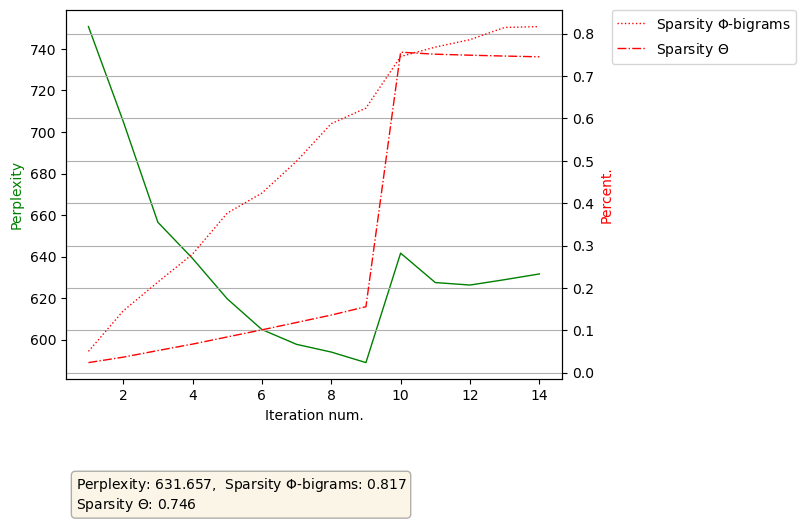

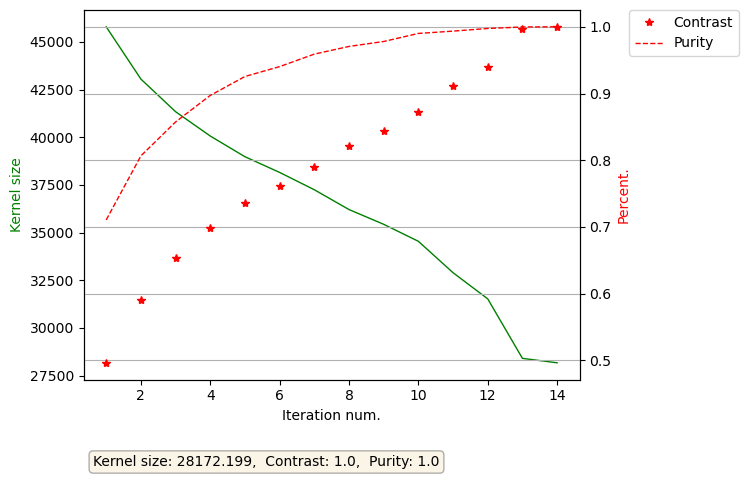

number of topics:  5
rnd-realization:  2


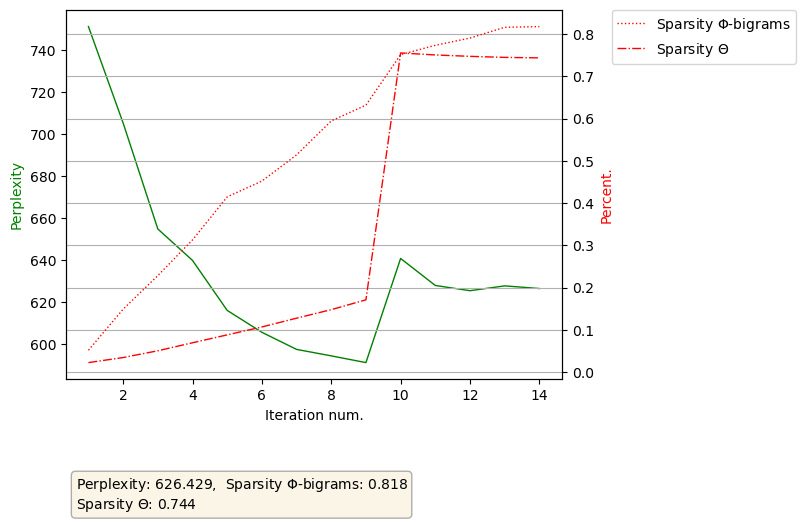

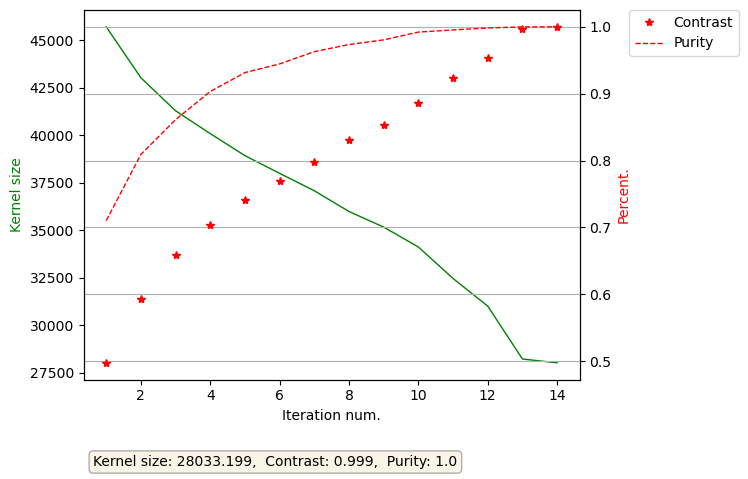

number of topics:  5
rnd-realization:  3


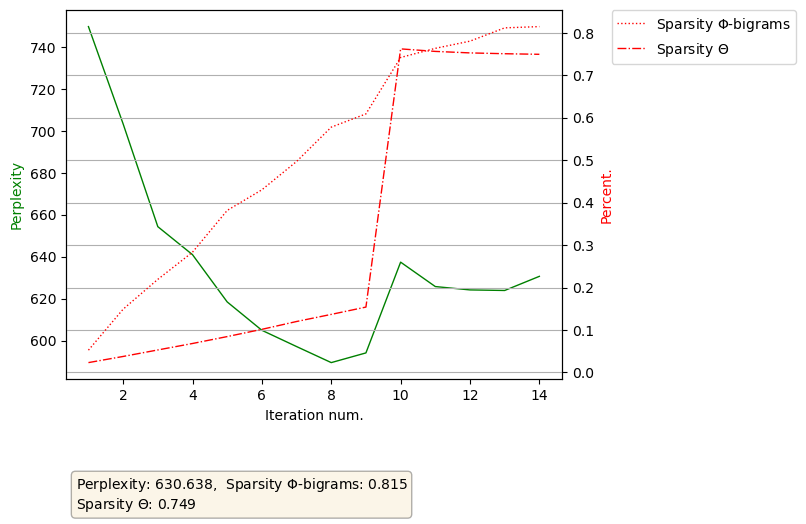

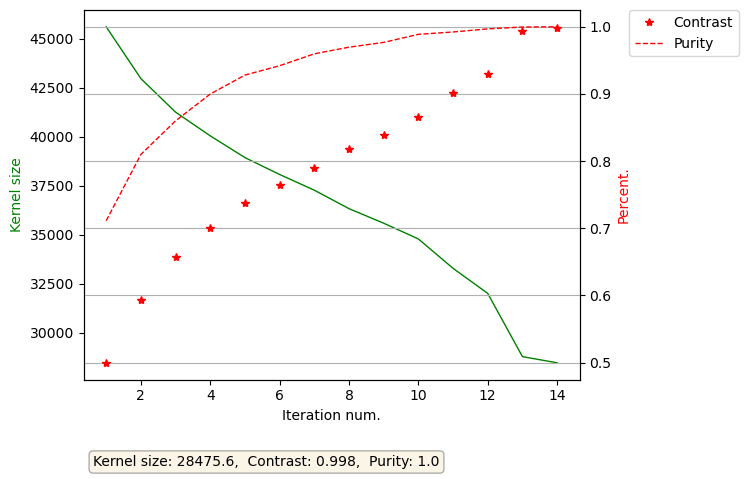

number of topics:  5
rnd-realization:  4


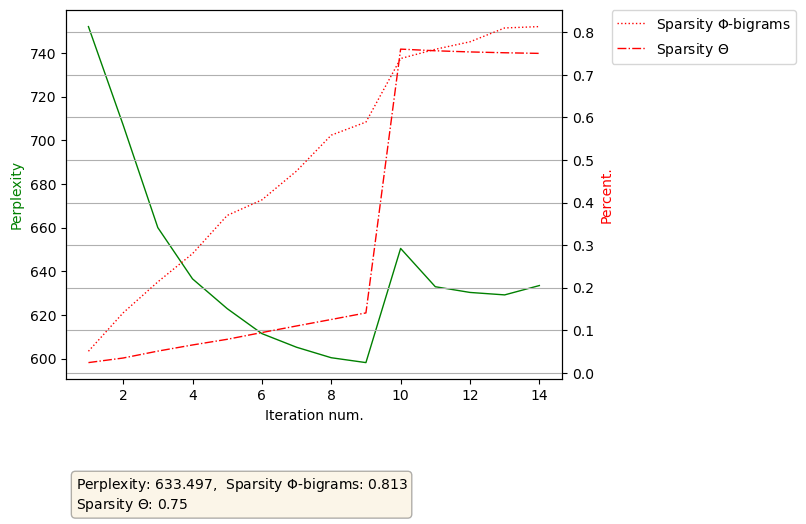

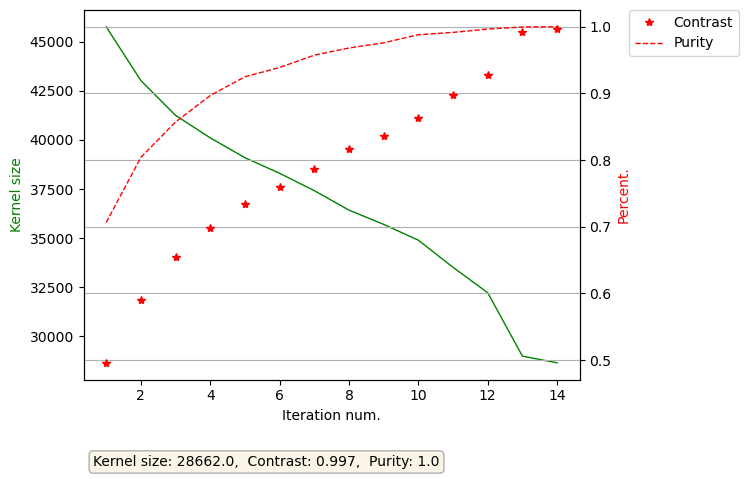

number of topics:  5
rnd-realization:  5


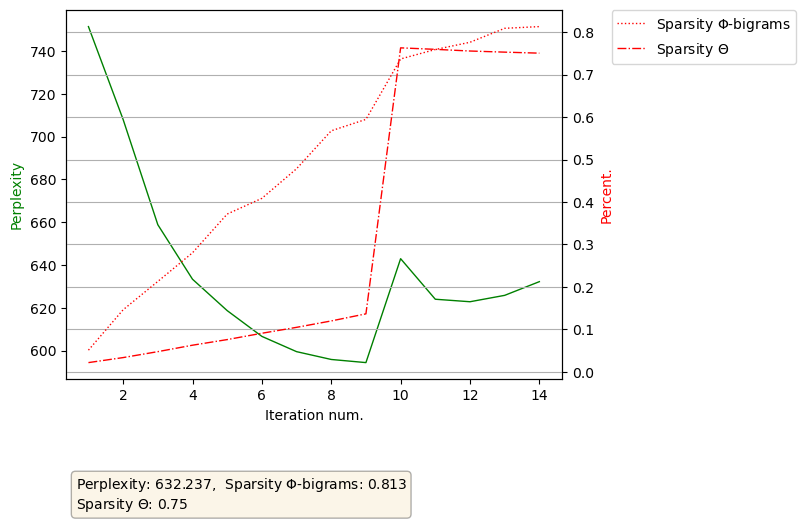

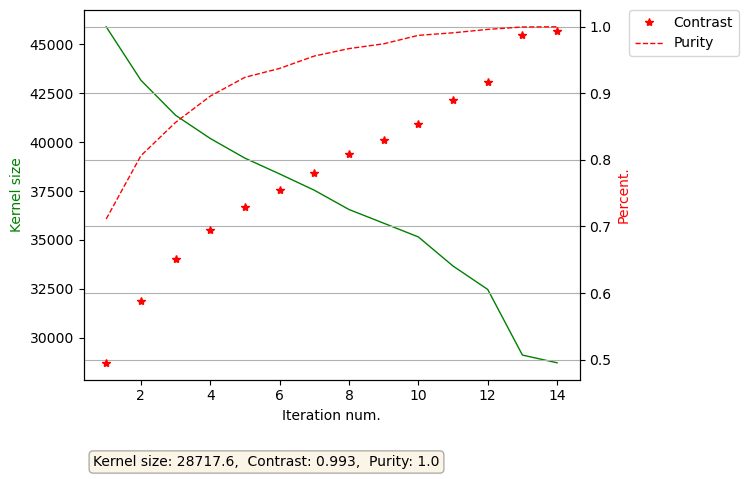

number of topics:  10
rnd-realization:  1


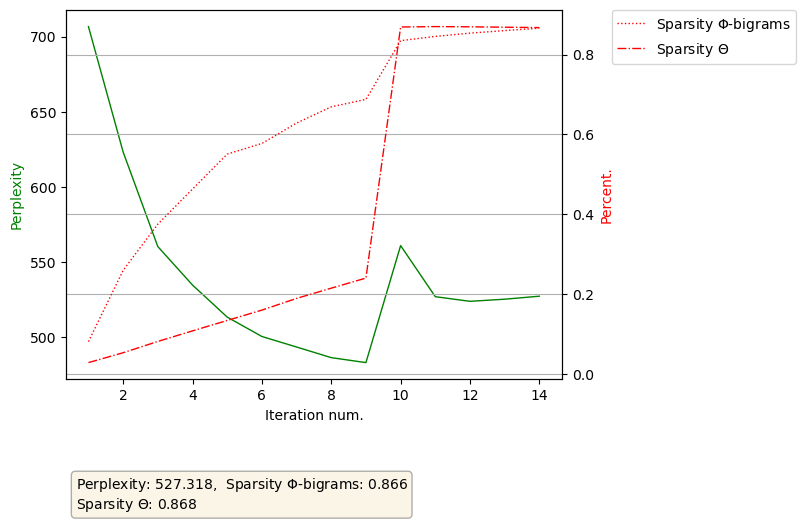

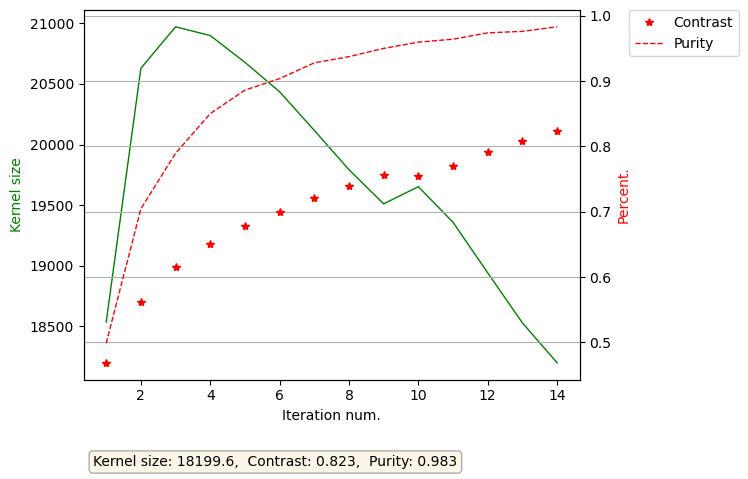

number of topics:  10
rnd-realization:  2


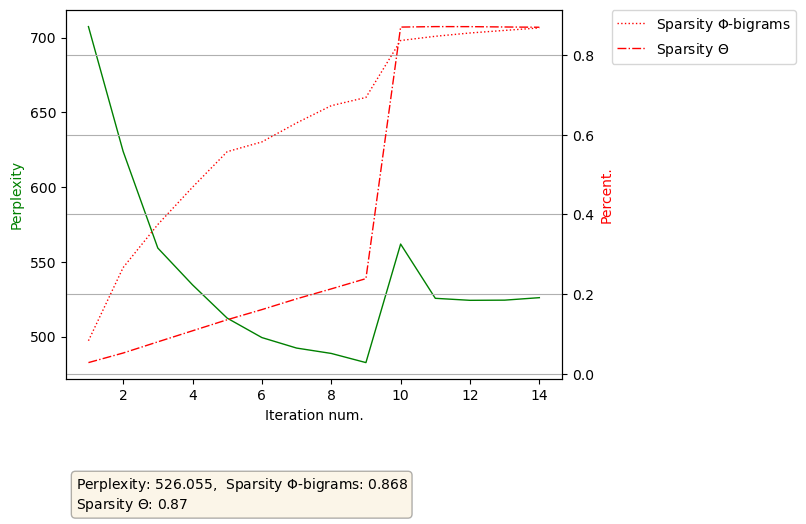

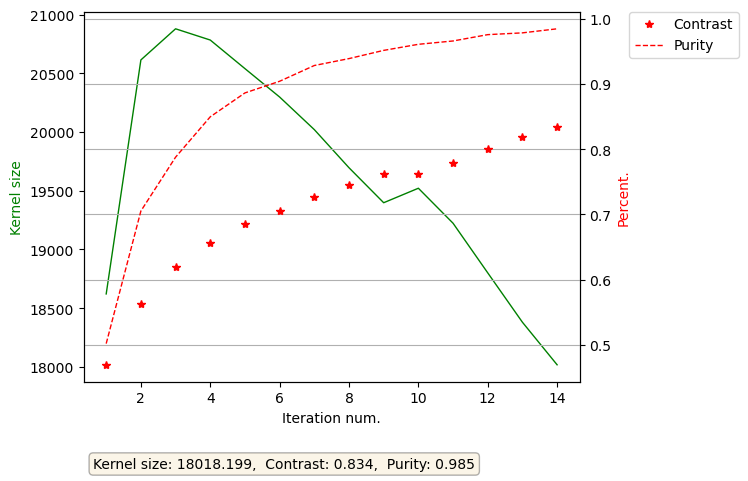

number of topics:  10
rnd-realization:  3


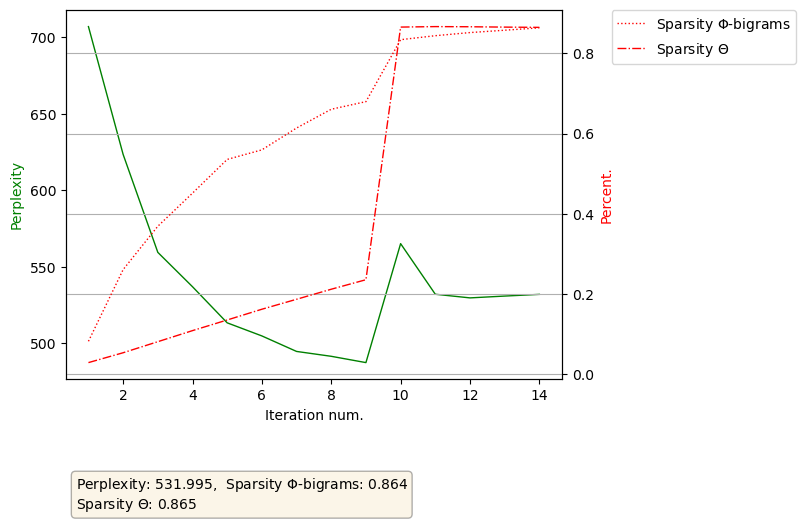

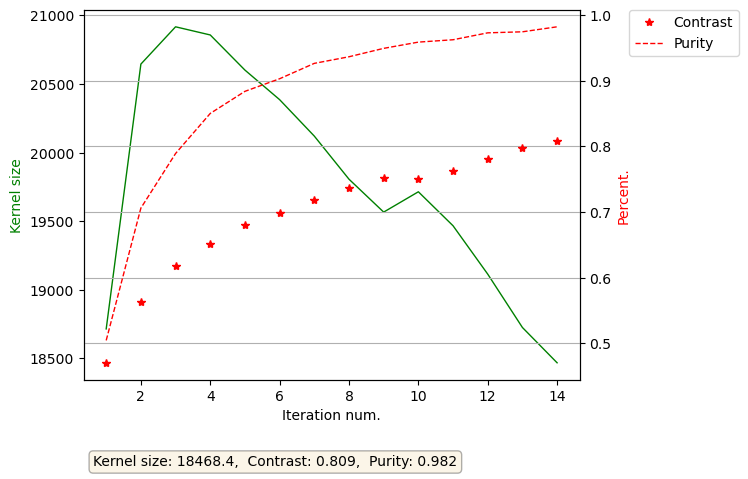

number of topics:  10
rnd-realization:  4


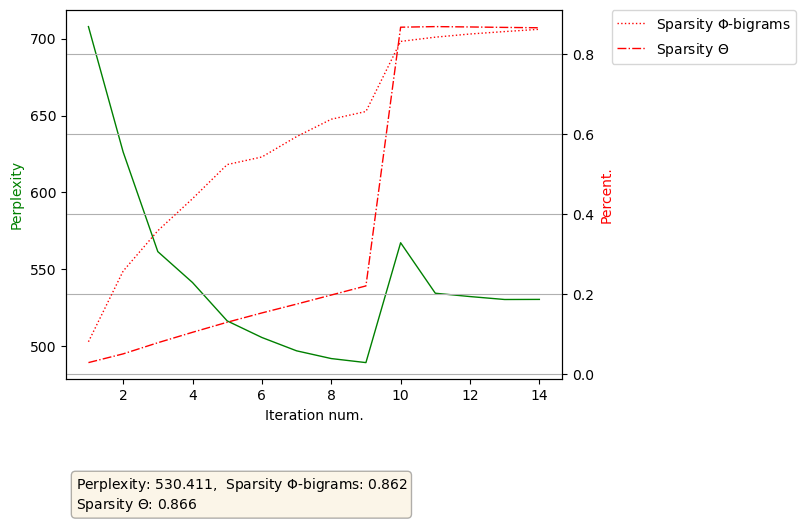

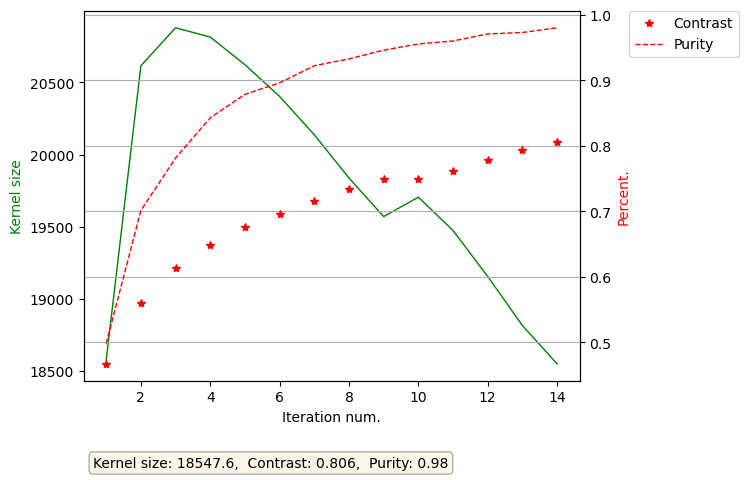

number of topics:  10
rnd-realization:  5


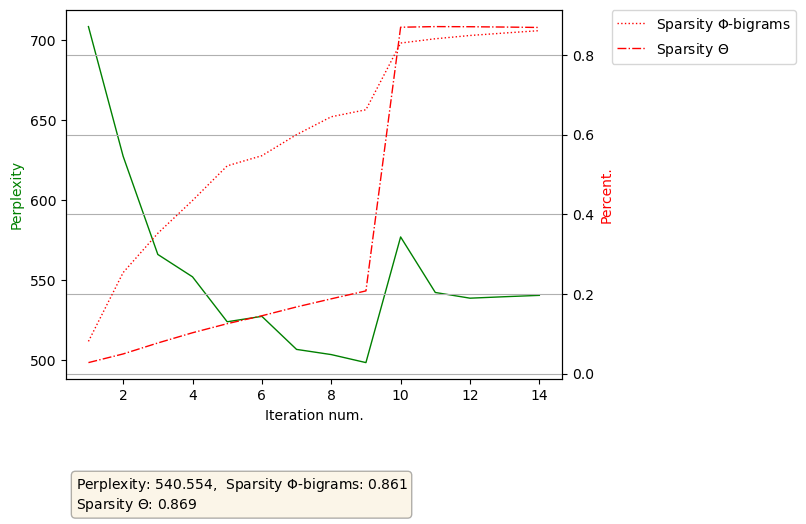

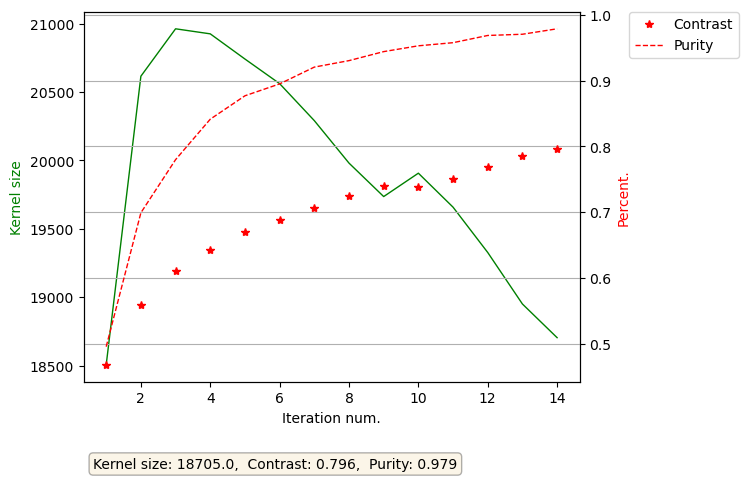

number of topics:  15
rnd-realization:  1


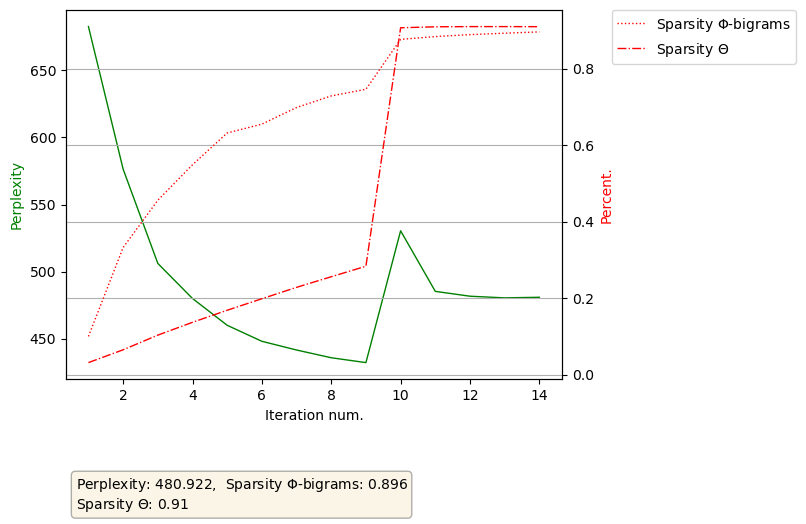

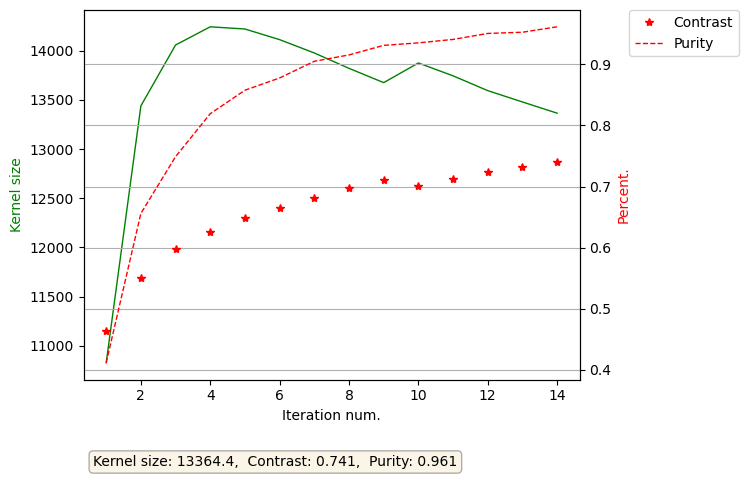

number of topics:  15
rnd-realization:  2


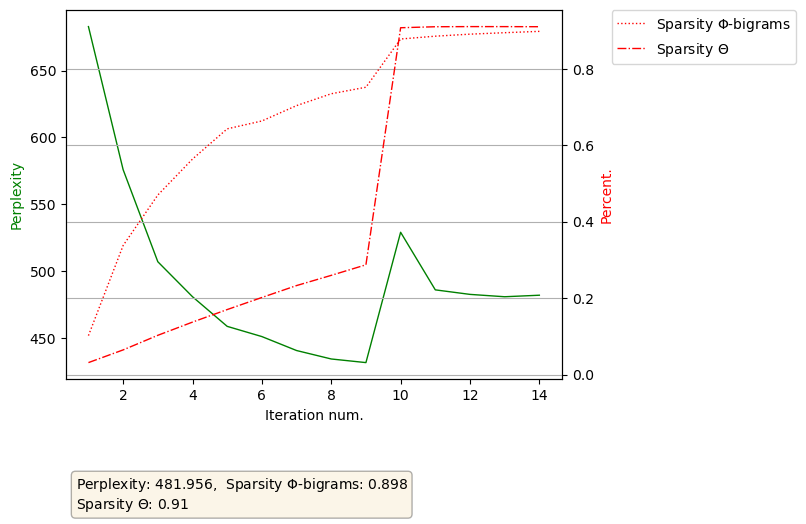

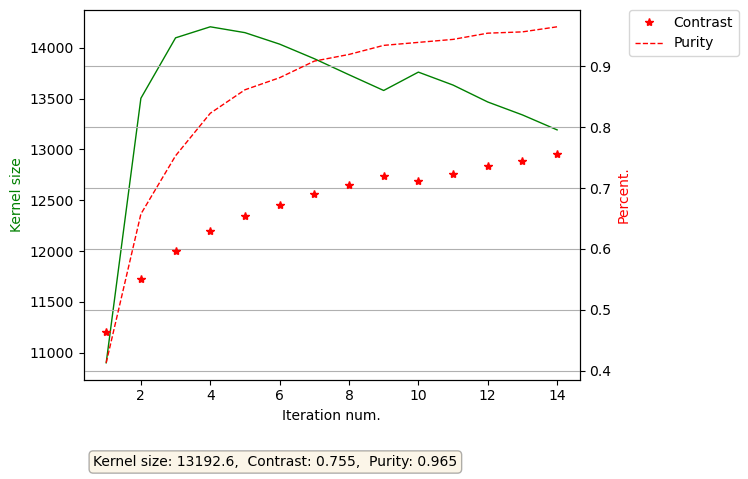

number of topics:  15
rnd-realization:  3


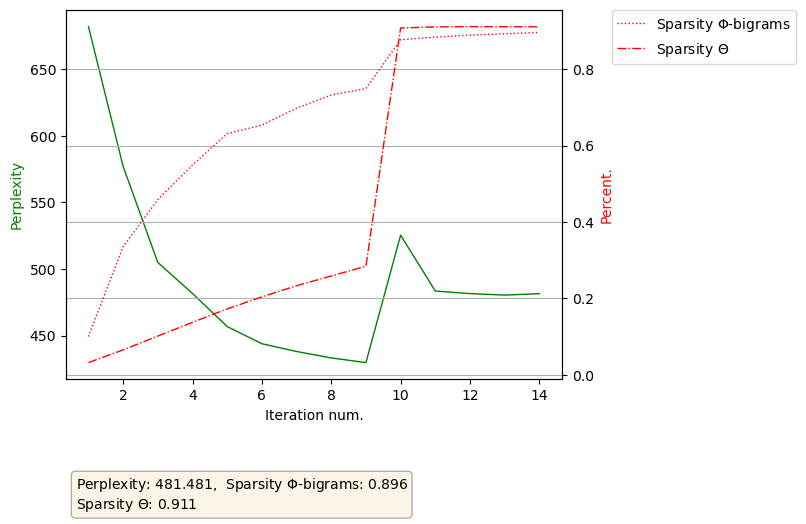

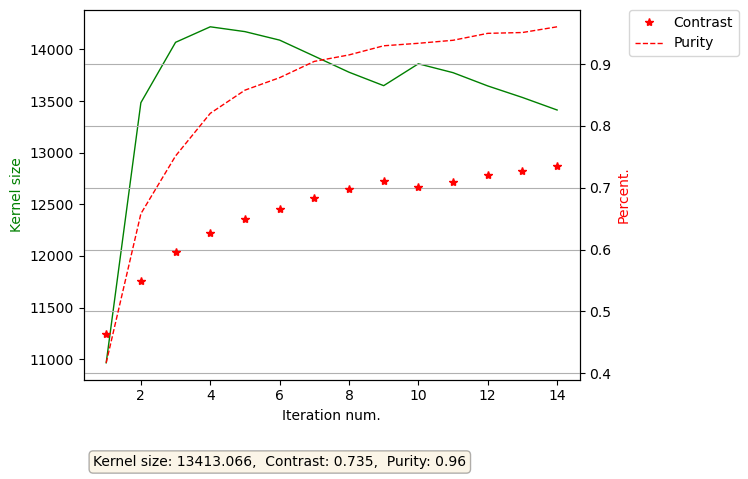

number of topics:  15
rnd-realization:  4


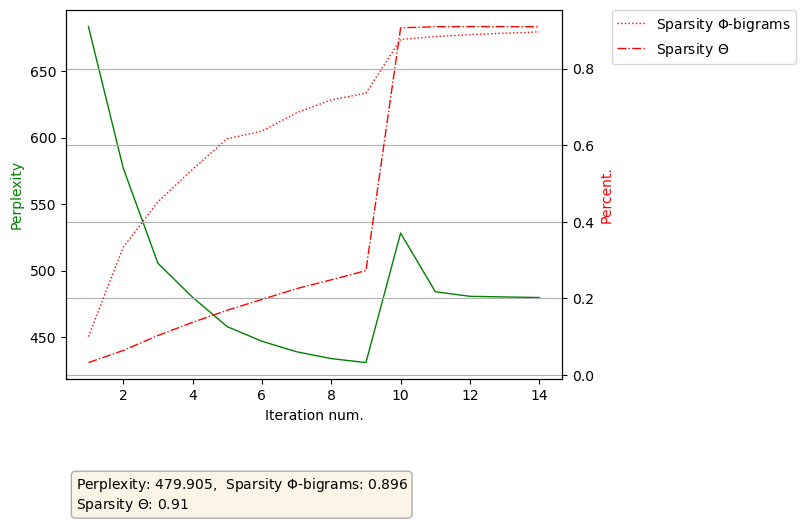

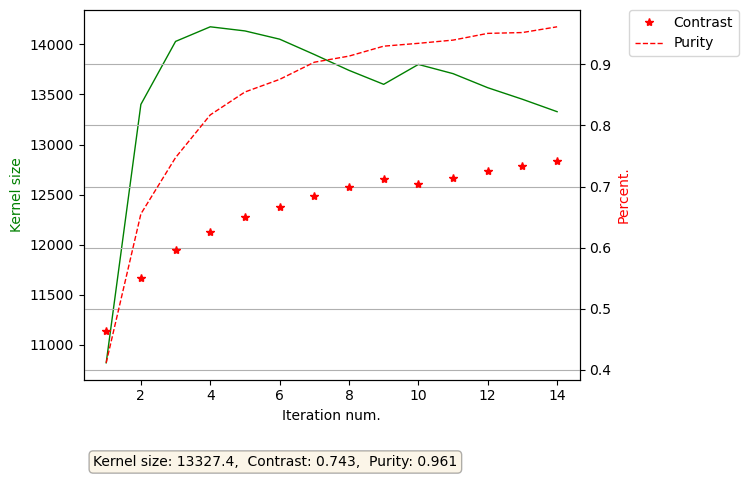

number of topics:  15
rnd-realization:  5


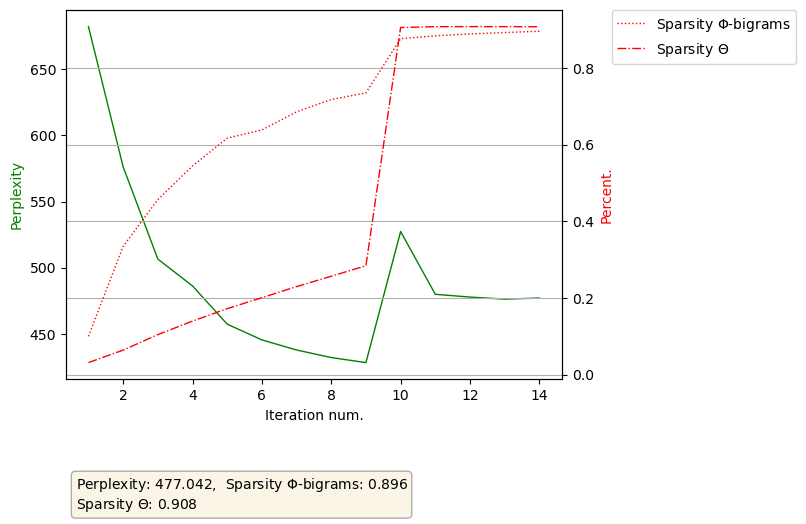

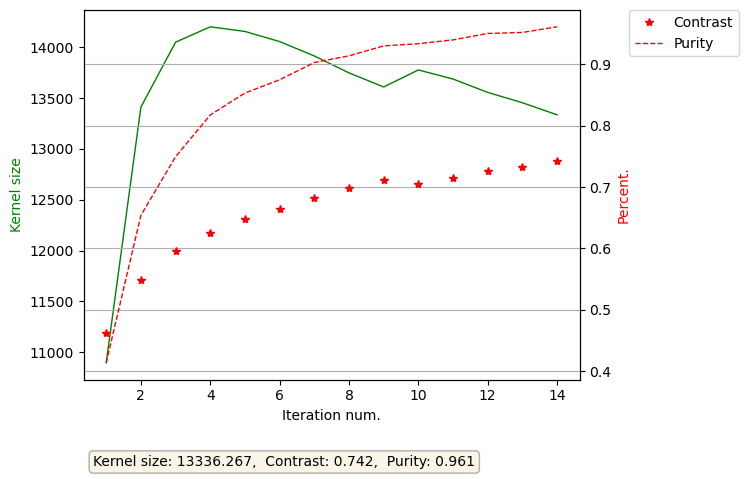

number of topics:  20
rnd-realization:  1


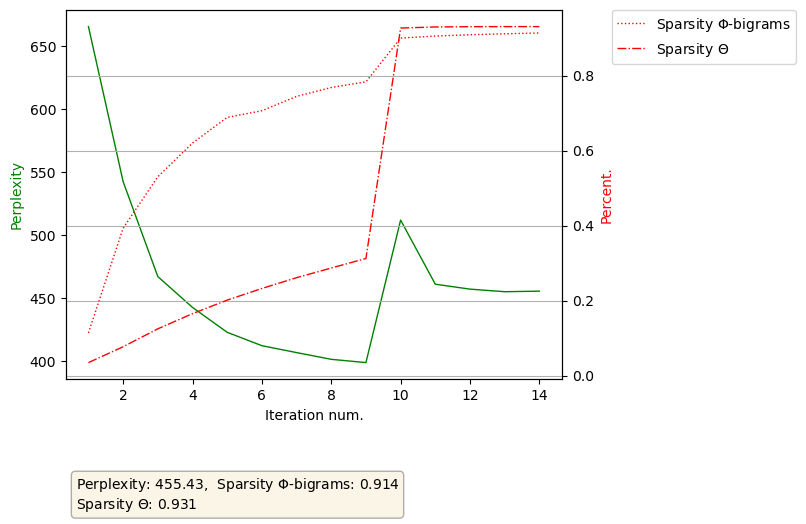

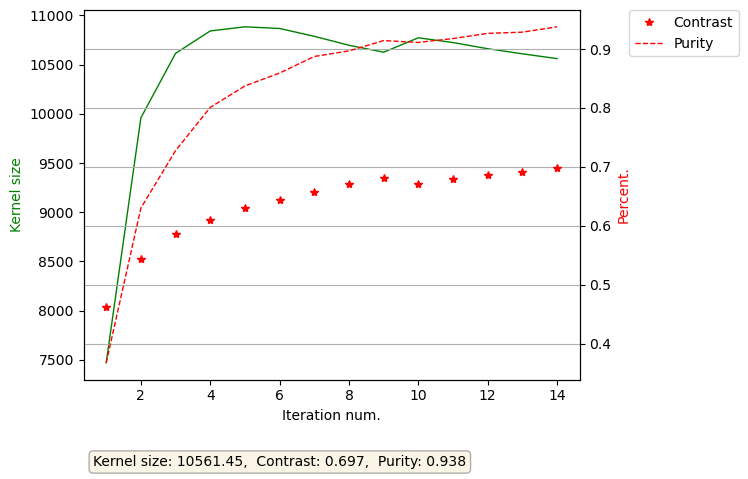

number of topics:  20
rnd-realization:  2


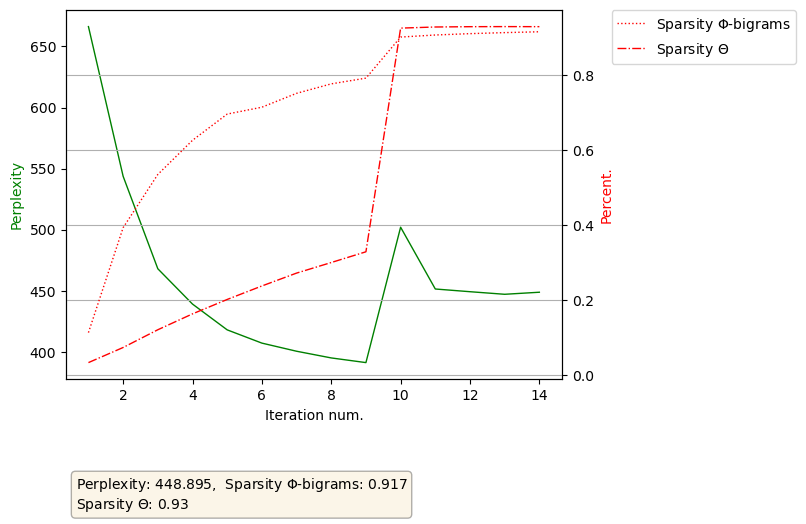

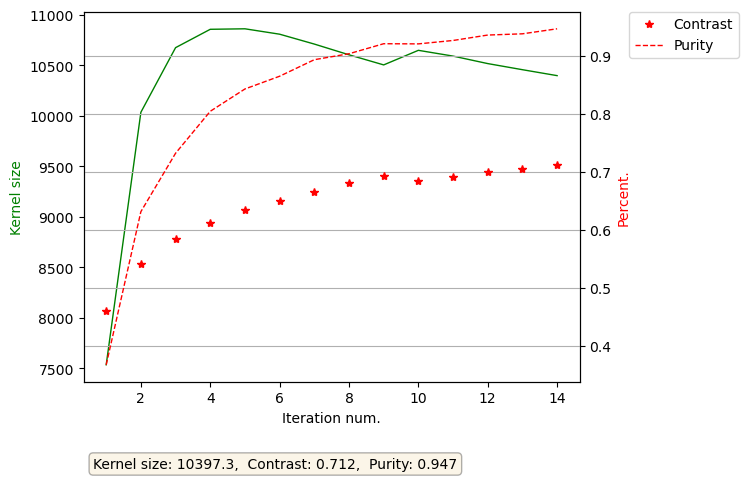

number of topics:  20
rnd-realization:  3


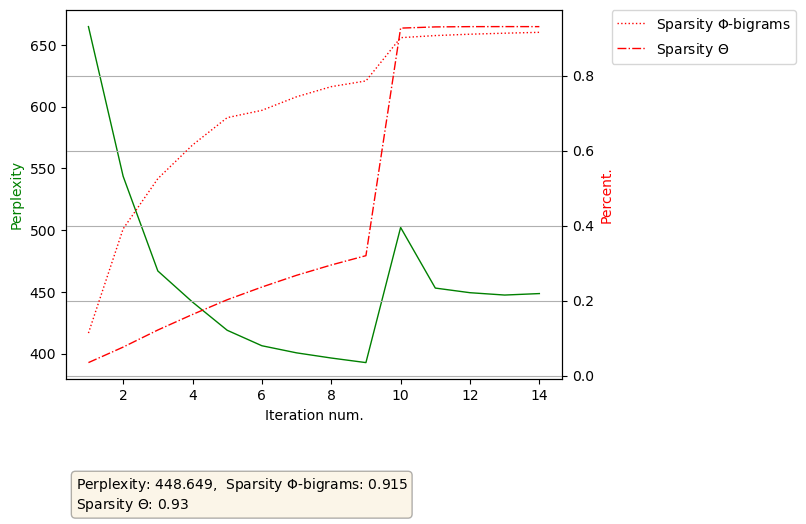

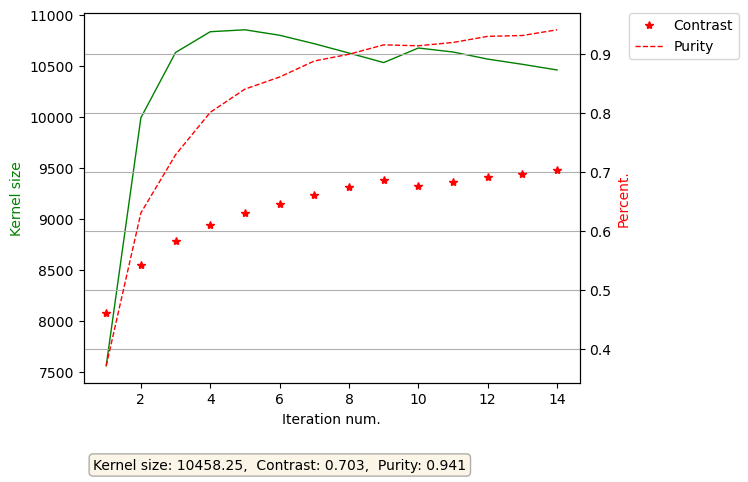

number of topics:  20
rnd-realization:  4


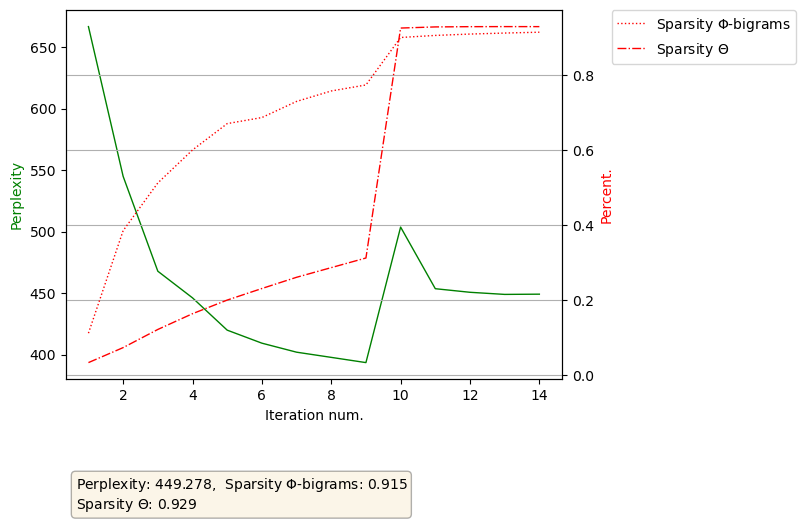

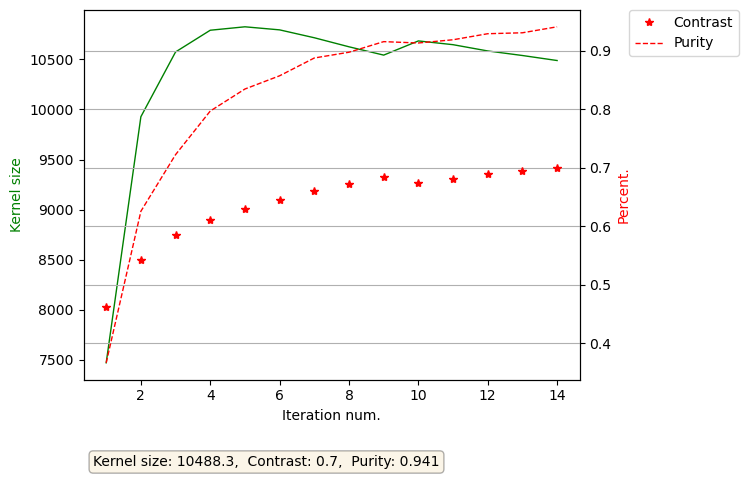

number of topics:  20
rnd-realization:  5


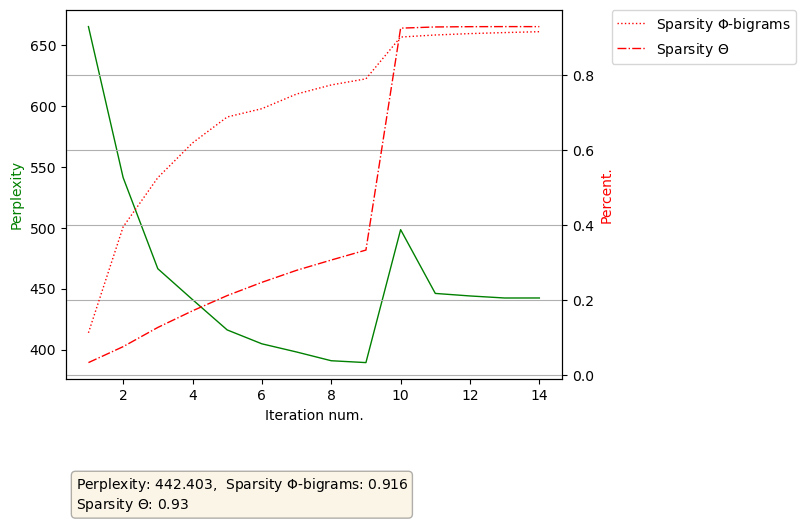

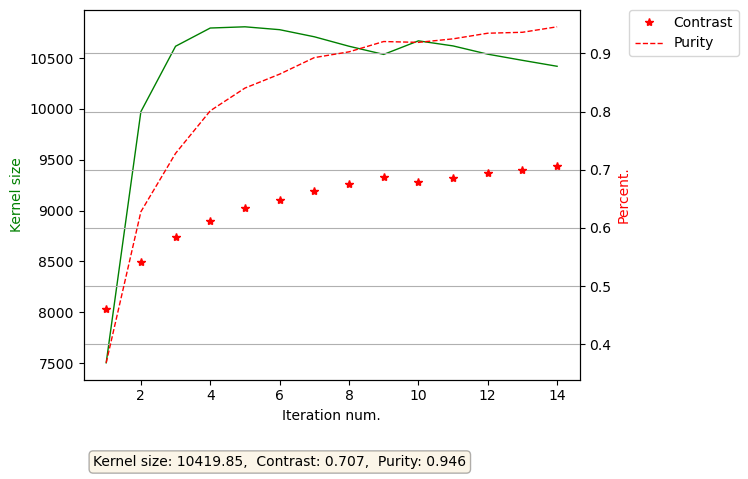

number of topics:  25
rnd-realization:  1


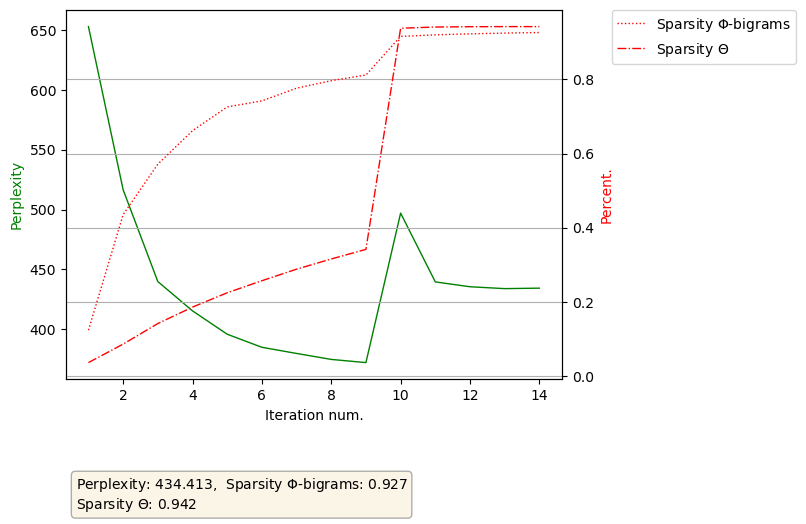

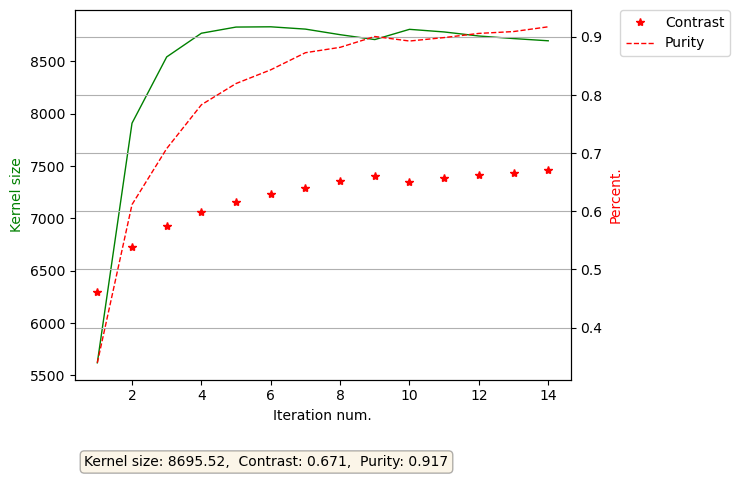

number of topics:  25
rnd-realization:  2


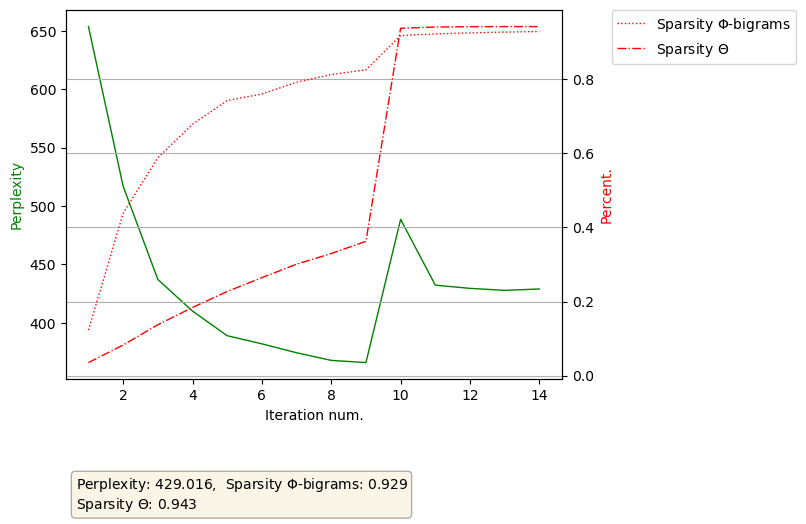

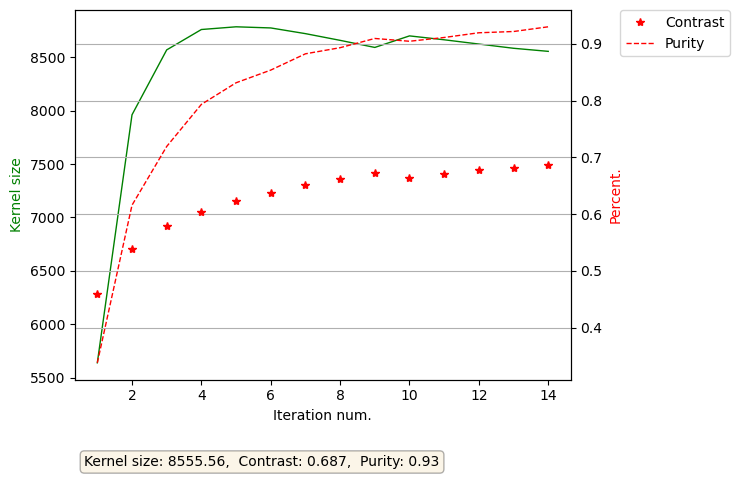

number of topics:  25
rnd-realization:  3


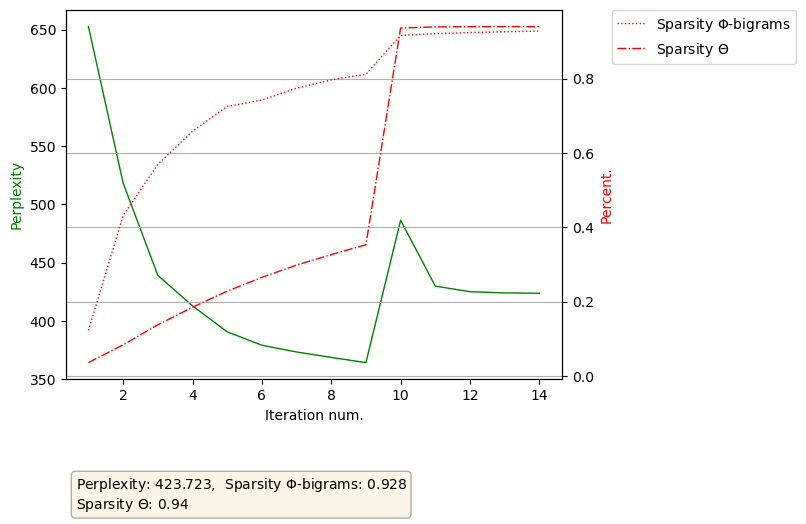

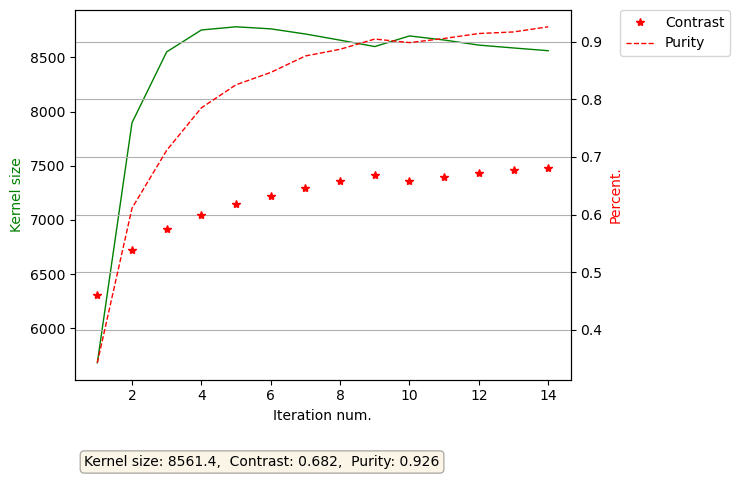

number of topics:  25
rnd-realization:  4


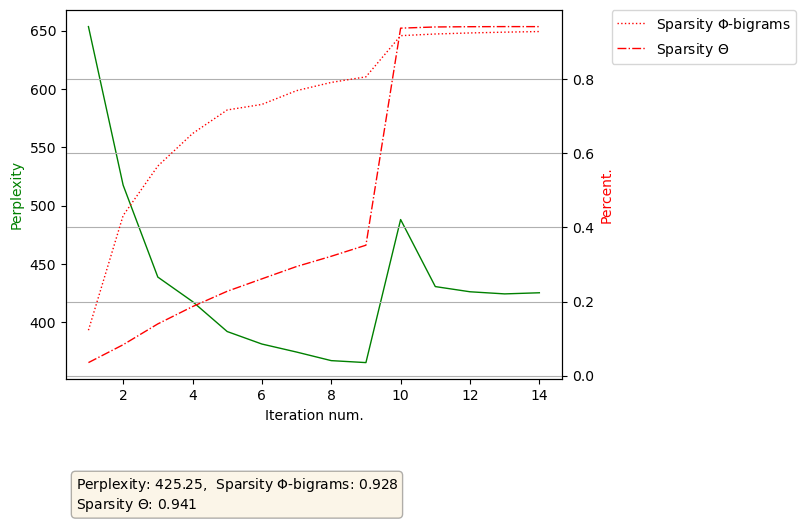

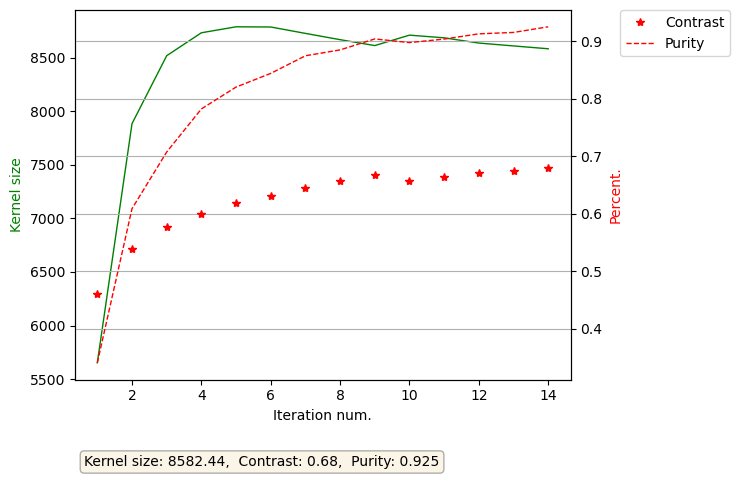

number of topics:  25
rnd-realization:  5


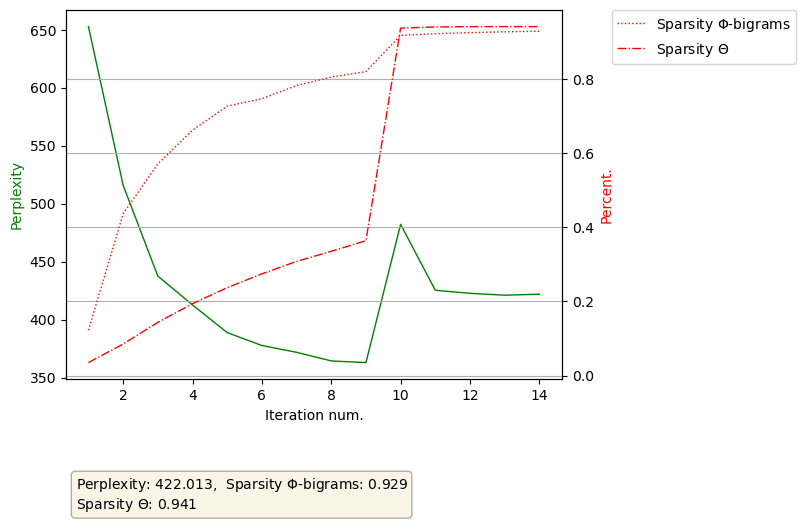

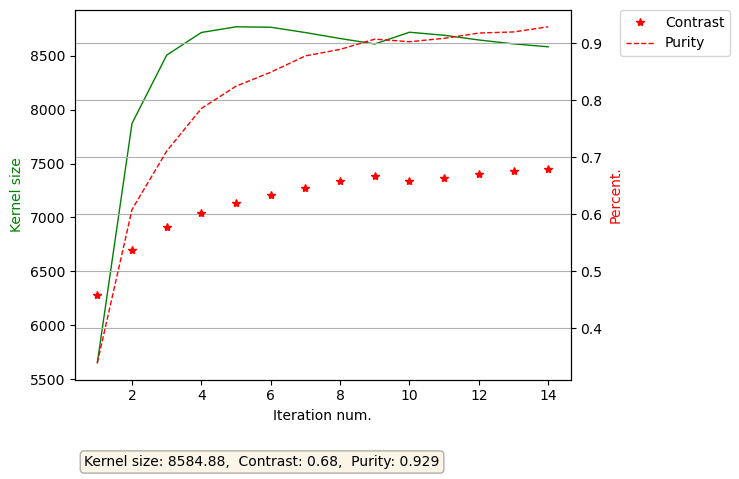

number of topics:  30
rnd-realization:  1


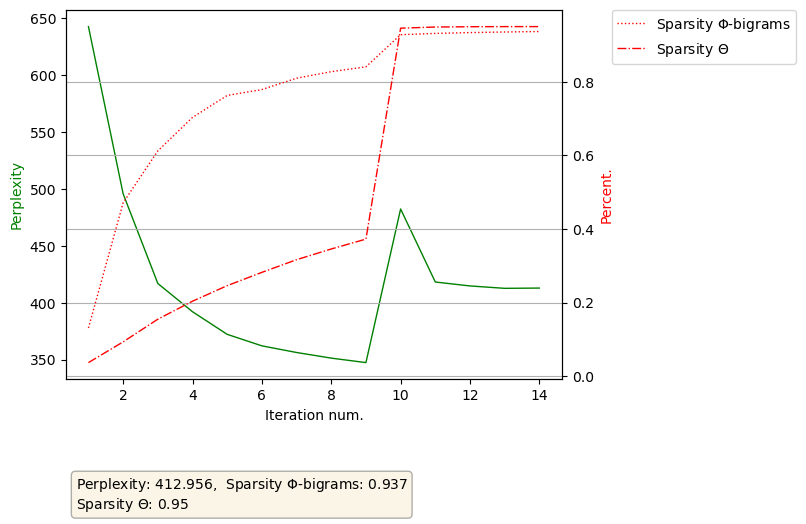

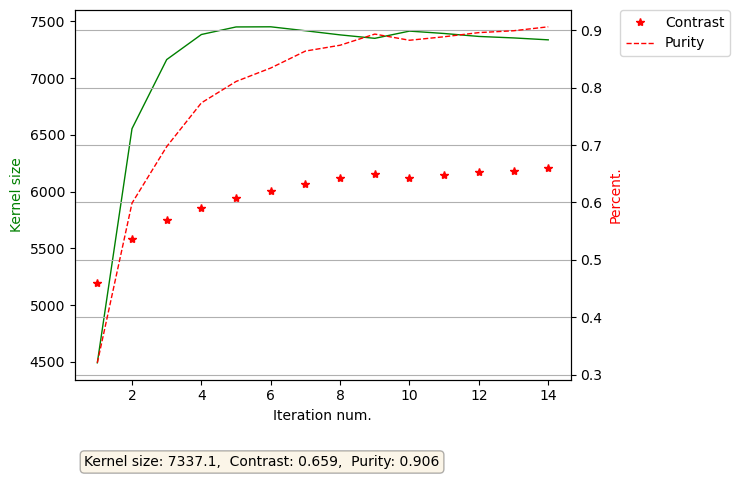

number of topics:  30
rnd-realization:  2


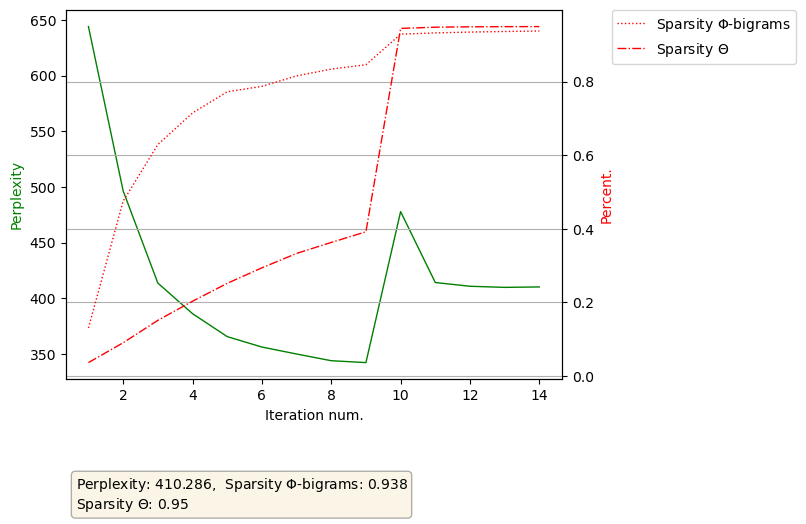

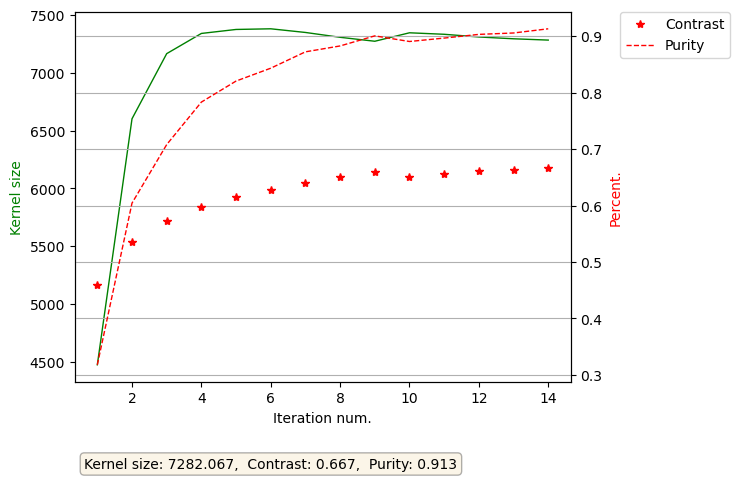

number of topics:  30
rnd-realization:  3


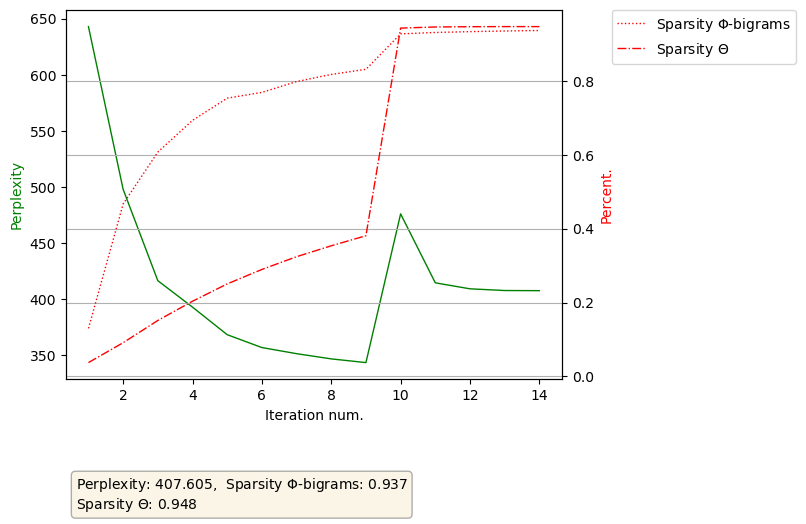

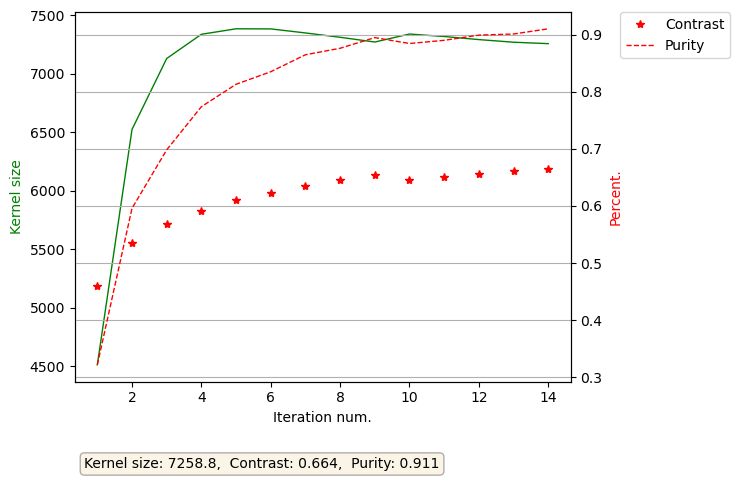

number of topics:  30
rnd-realization:  4


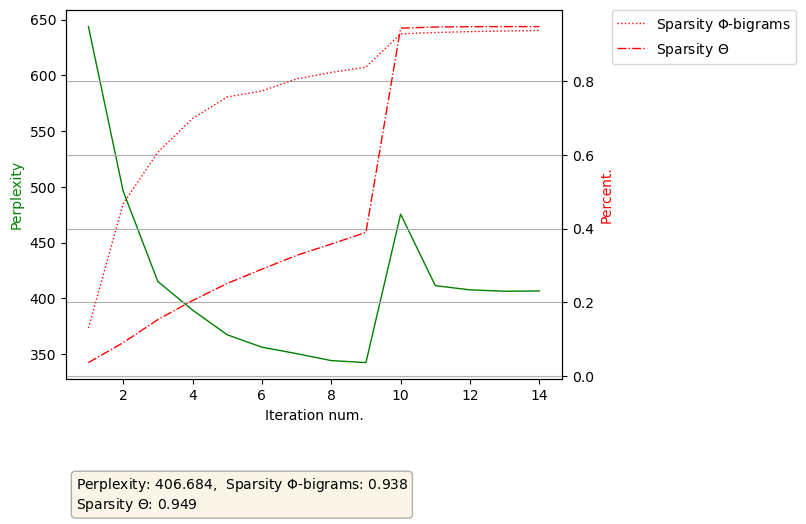

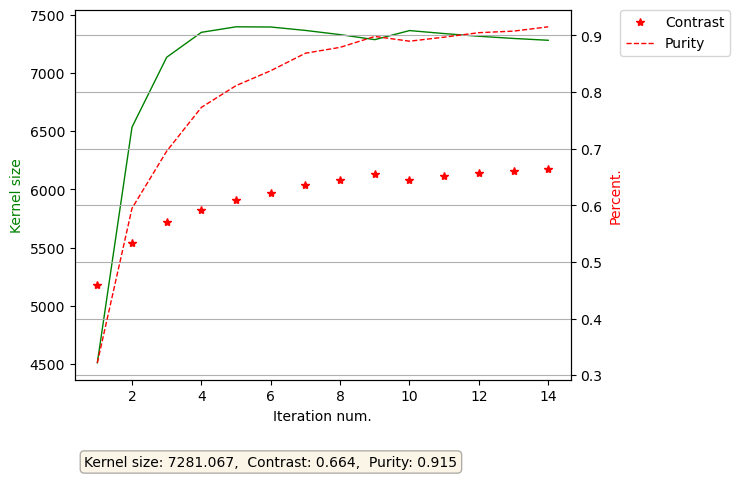

number of topics:  30
rnd-realization:  5


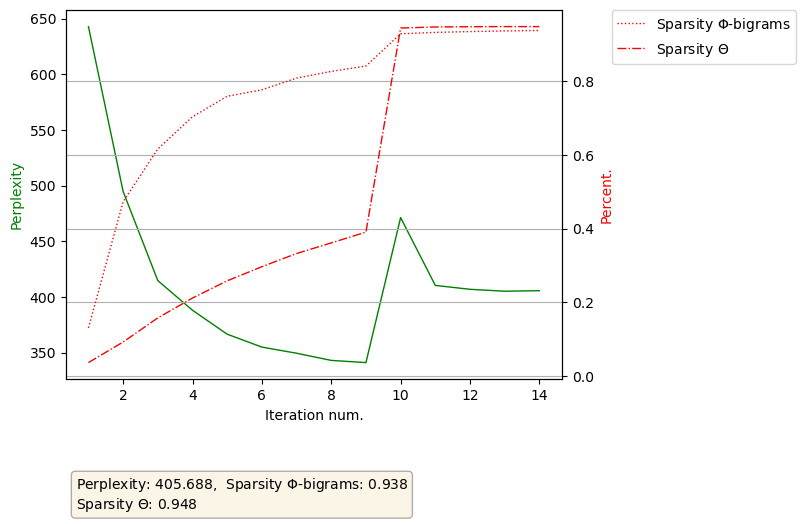

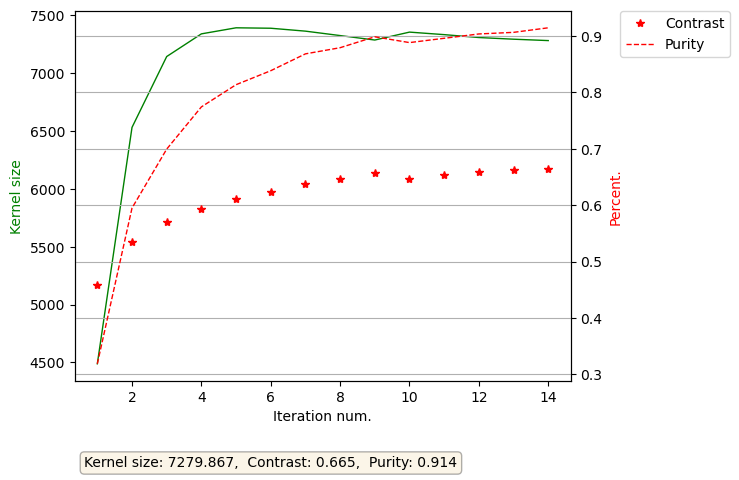

In [39]:
# === ! Main loop for all procedures  ====

top_num_list=[5, 10, 15, 20, 25, 30]
seed_list=[1, 2, 3, 4, 5]

for top_num in top_num_list:
    
    class_ids={'text': 1.0, 'bigrams':1.0}
    all_topics, domain_topics, background_topics=SetTopicsNum(top_num, 0)  #SetTopicsNum(d, b)

    for seed in seed_list:
        model=artm.ARTM(topic_names = all_topics,
                            dictionary=main_dictionary,
                            class_ids=class_ids,
                            cache_theta=True,
                            theta_columns_naming='title',
                            seed=seed) 
        model.initialize(dictionary=main_dictionary)
        SetScores(model)
        model.regularizers.add(artm.DecorrelatorPhiRegularizer('DecorrPhi', gamma=0, topic_names=domain_topics, tau=0.1)) 
        model.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=10)
        model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', gamma=0, topic_names=domain_topics, dictionary=main_dictionary, tau=-0.2))
        model.regularizers.add(artm.SmoothSparseThetaRegularizer(name='SparseTheta', topic_names=domain_topics, tau=-2))
        model.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=5)

        TopicTrackerTable_cur, rows_num=ReadTableResults()
        CreateFilesWithTopics(rows_num)
        CallingResultsProcedures(model)

In [120]:
# print parameters and scores (perplexity, Phi-sparsity, Theta-sparsity, Kernel size, Contrast, Purity) for all model realizations
TopicTrackerTable_cur = pd.read_csv(results_dir+model_results_file)
TopicTrackerTable_cur

,num,topics num,seed,class_ids,steps num,strategy,perplexity,Phi-sparcity,Theta-sparcity,Kernel size,Contrast,Purity
0,1,5,1,"{'text': 1.0, 'bigrams': 1.0}",15,"[DecorrPhi, SparsePhi, SparseTheta]: 5.00e-02;...",774.0,0.7675,0.7667,44453.1992,0.9086,0.9928
1,2,5,2,"{'text': 1.0, 'bigrams': 1.0}",15,"[DecorrPhi, SparsePhi, SparseTheta]: 5.00e-02;...",757.0,0.7797,0.7685,43106.1992,0.9331,0.9968
2,3,5,3,"{'text': 1.0, 'bigrams': 1.0}",15,"[DecorrPhi, SparsePhi, SparseTheta]: 5.00e-02;...",754.0,0.7618,0.7680,44994.0000,0.8993,0.9909
3,4,5,4,"{'text': 1.0, 'bigrams': 1.0}",15,"[DecorrPhi, SparsePhi, SparseTheta]: 5.00e-02;...",786.0,0.7972,0.7687,41055.0000,0.9736,0.9995
4,5,5,5,"{'text': 1.0, 'bigrams': 1.0}",15,"[DecorrPhi, SparsePhi, SparseTheta]: 5.00e-02;...",757.0,0.7578,0.7669,45539.1992,0.8945,0.9905
5,6,10,1,"{'text': 1.0, 'bigrams': 1.0}",15,"[DecorrPhi, SparsePhi, SparseTheta]: 5.00e-02;...",607.0,0.8586,0.8774,25032.6992,0.8083,0.9729
6,7,10,2,"{'text': 1.0, 'bigrams': 1.0}",15,"[DecorrPhi, SparsePhi, SparseTheta]: 5.00e-02;...",615.0,0.8577,0.8780,25099.0000,0.8035,0.9718
7,8,10,3,"{'text': 1.0, 'bigrams': 1.0}",15,"[DecorrPhi, SparsePhi, SparseTheta]: 5.00e-02;...",616.0,0.8514,0.8778,25666.5000,0.7951,0.9629
8,9,10,4,"{'text': 1.0, 'bigrams': 1.0}",15,"[DecorrPhi, SparsePhi, SparseTheta]: 5.00e-02;...",615.0,0.8567,0.8770,25190.1992,0.8009,0.9690
9,10,10,5,"{'text': 1.0, 'bigrams': 1.0}",15,"[DecorrPhi, SparsePhi, SparseTheta]: 5.00e-02;...",601.0,0.8523,0.8778,25625.4004,0.7971,0.9643


In [40]:
# Print top-10 bigrams for the last model realization (number of topics=30)
top_tokens = model.score_tracker["Bigrams_Top10_Tokens"]  
for topic_name in model.topic_names:
    token_line_list=[]
    print (topic_name)
    for (token, weight) in zip(top_tokens.last_tokens[topic_name],
                               top_tokens.last_weights[topic_name]):    
         token_line_list.append(token)
        #print token  #, '-', round(weight,3)
    print (', '.join(token_line_list))  

d1
сцена_театр, санкт_петербург, театр_санктъ, санктъ_петербургъ, петербургъ_опера, мюзик_холл, театр_мюзик, фрагмент_спектакль, фото_шахмаметьев, никуда_не
d2
социальный_сеть, получить_достижение, авторский_право, не_просить, господь_бог, не_искать, объект_авторский, ваш_страница, это_просто, свой_страница
d3
не_хотеть, любить_не, любить_любить, любить_свой, не_забыть, хотеть_хотеть, любить_это, хотеть_сказать, спасибо_весь, не_нравиться
d4
коли_не, нав_ть, що_ти, потр_бно, ск_лька, дядя_митя, пиш_ть, що_не, хто_не, коли_ти
d5
весь_вопрос, наш_город, очень_сильно, очень_приятно, личный_сообщение, ура_ура, всё_вопрос, сильно_любить, вопрос_писать, наш_клиент
d6
хороший_настроение, ез_льт, весь_хороший, ез_льтат, натяжной_потолок, мечта_сбываться, сходить_ум, реза_льт, пит_нию, льт_нт
d7
новый_возможность, наш_отношение, развивать_наш, получить_доступ, доступ_новый, отношение_получить, приятель_развивать, счастие_это, седьмой_этаж, стереть_фонд
d8
скачать_бесплатно, писать_личка, свой_б

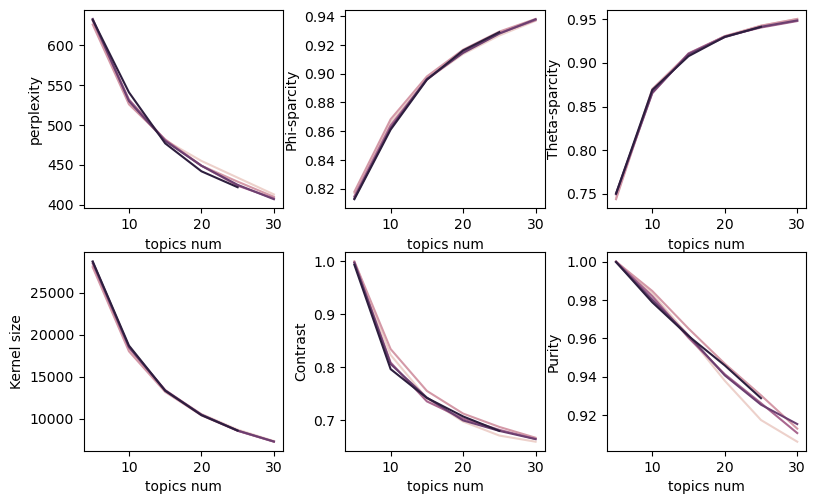

In [57]:
# Plot model characteristics (perplexity, phi-spars, theta-spars, kernel, contrast, purity) 
# for different random realizations (1-5, different lines on one graph - different random realizations)

import seaborn as sns
ncols=2
nrows=3
fig, axs = plt.subplots(ncols, nrows, figsize=(8,5))
y_list=['perplexity', 'Phi-sparcity', 'Theta-sparcity', 'Kernel size', 'Contrast', 'Purity']
plt.tight_layout()

it=0
for row in range(nrows-1):
    for col in range(ncols+1):

        sns.lineplot(x="topics num", y=y_list[it], data=TopicTrackerTable_cur, hue="seed", ax=axs[row, col], legend = False)
        if it<6:
            it=it+1
